Notebook by [Louis Ragon](https://www.linkedin.com/in/louis-ragon-705881132).

#Getting started with pylightxl

This notebook shows how to use [pylightxl library](https://pylightxl.readthedocs.io) to read, analyse and write .xslx file.

Each of the codes are based on this workbook: [file_example_XLSX_100.xlsx](https://file-examples.com/wp-content/uploads/2017/02/file_example_XLSX_100.xlsx). You can download it by clicking on it.

## How does it work?

From this:

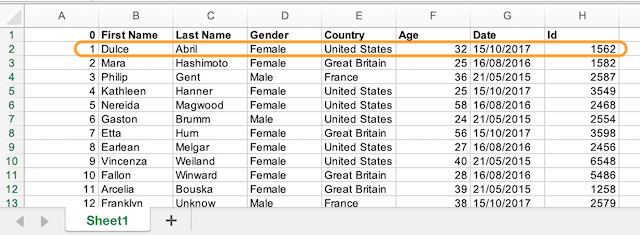

With 1 line of code:
```
db.ws(ws='Sheet1').row(row=2)
```

To this:
```
[1, 'Dulce', 'Abril', 'Female', 'United States', 32, '15/10/2017', 1562]
```

# Table of contents

>[Requierements](#scrollTo=LUAjgH5NkZv2)

>>[Setting up pylightxl library](#scrollTo=GTfyjxO4dgdG)

>>[Uploading Excel file](#scrollTo=P1IqlWivdq3W)

>[Read the data available in a workbook](#scrollTo=J77fe4Fh2n5a)

>>[The sheets](#scrollTo=T4CSGtZEd62U)

>>[The column headings](#scrollTo=dSMSg1xWd_2x)

>>[The content of a column by position](#scrollTo=6ksrgQcIeGx0)

>>[The content of a column by name](#scrollTo=v7rRMYHkePXN)

>[Single column conditions](#scrollTo=p9la_KiFr0F0)

>>[The number of occurrences of an item (string)](#scrollTo=DgbnantkeYDi)

>>[The number of items in a condition (integer)](#scrollTo=OZkdboynej16)

>[Two columns conditions](#scrollTo=xPfKUlP9o5Ww)

>>[The number of elements in two conditions (string and integer)](#scrollTo=88riRQeeetXd)

>[Write data in a workbook](#scrollTo=J1aQx9L0X3gs)

>>[New data in a blank workbook](#scrollTo=f_3YorvRe3GG&)

>>[Adding data to an existing workbook](#scrollTo=GODHAarie-9-)

# Requirements

## Setting up pylightxl library

Ignore the warning about the library. It will be fixed after the code is executed.

In [ ]:
!pip install pylightxl
import pylightxl as xl

## Uploading Excel file

This library is also compatible with .csv files but in this notebook we will only handle .xlsx files.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

db = xl.readxl(fn)

# Read the data available in a workbook

## The sheets

In [ ]:
print('Sheets:')
print(db.ws_names)

Sheets:
['Sheet1']


## The column headings

In [ ]:
sheet_name = 'Sheet1'

print('Column headings:')
print(db.ws(ws=sheet_name).row(row=1))

Column headings:
[0, 'First Name', 'Last Name', 'Gender', 'Country', 'Age', 'Date', 'Id']


## The content of a column by position

In [ ]:
sheet_name = 'Sheet1'
column_index = 5

list = db.ws(ws=sheet_name).col(col=column_index)
list.pop(0)

print('Content of column ' + str(column_index) + ':')
print(list)

Content of column 5:
['United States', 'Great Britain', 'France', 'United States', 'United States', 'United States', 'Great Britain', 'United States', 'United States', 'Great Britain', 'Great Britain', 'France', 'Great Britain', 'Great Britain', 'Great Britain', 'France', 'France', 'Great Britain', 'France', 'France', 'United States', 'United States', 'Great Britain', 'France', 'France', 'Great Britain', 'United States', 'France', 'United States', 'Great Britain', 'Great Britain', 'Great Britain', 'Great Britain', 'France', 'United States', 'United States', 'France', 'United States', 'United States', 'United States', 'United States', 'United States', 'France', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'Great Britain', 'France', 'United States', 'United States', 'United States', 'Great Britain', 'United States', 'United States', 'Great Britain', 'Great Britain', 'France', 'Great Britain', 'Grea

## The content of a column by name

We will use this method throughout because I honestly think that searching by column name is easier.

In [ ]:
sheet_name = 'Sheet1'
column_name = 'Country'
address = ''

if len(db.ws(ws=sheet_name).row(row=1)) != len(set(db.ws(ws=sheet_name).row(row=1))):
    print('There are several columns with similar headings. Please rename or delete them.')
else:
    for column_id, item in enumerate(db.ws(ws=sheet_name).row(row=1), start=1):
      if column_name == db.ws(sheet_name).index(row=1,col=column_id):
          address = column_id
          break

    if address == '':
        print('Column ' + str(column_name) + ' doesnt exist')
    else:
        list = db.ws(ws=sheet_name).col(col=column_id)
        list.pop(0)
        print('Content of the column named "' + str(column_name) + '":')
        print(list)

Content of the column named "Country":
['United States', 'Great Britain', 'France', 'United States', 'United States', 'United States', 'Great Britain', 'United States', 'United States', 'Great Britain', 'Great Britain', 'France', 'Great Britain', 'Great Britain', 'Great Britain', 'France', 'France', 'Great Britain', 'France', 'France', 'United States', 'United States', 'Great Britain', 'France', 'France', 'Great Britain', 'United States', 'France', 'United States', 'Great Britain', 'Great Britain', 'Great Britain', 'Great Britain', 'France', 'United States', 'United States', 'France', 'United States', 'United States', 'United States', 'United States', 'United States', 'France', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'Great Britain', 'France', 'United States', 'United States', 'United States', 'Great Britain', 'United States', 'United States', 'Great Britain', 'Great Britain', 'France', 'Gre

# Single column conditions

## The number of occurrences of an item (string)

In [ ]:
sheet_name = 'Sheet1'
column_name = 'Country'
value_target = 'United States'
address = ''

if len(db.ws(ws=sheet_name).row(row=1)) != len(set(db.ws(ws=sheet_name).row(row=1))):
    print('There are several columns with similar headings. Please rename or delete them.')
else:
    for column_id, item in enumerate(db.ws(ws=sheet_name).row(row=1), start=1):
      if column_name == db.ws(sheet_name).index(row=1,col=column_id):
        address = column_id
        break

    if address == '':
        print('Column ' + str(column_name) + ' doesnt exist')
    else:
        number = db.ws(ws=sheet_name).col(col=address).count(value_target)
        print('Number of rows containing "' + value_target + '" in the column named "' + column_name + '":')
        print(number)

Number of rows containing "United States" in the column named "Country":
48


## The number of items in a condition (integer)

In [ ]:
sheet_name = 'Sheet1'
column_name = 'Age'
value_target = 35
address = ''
number = 0

if len(db.ws(ws=sheet_name).row(row=1)) != len(set(db.ws(ws=sheet_name).row(row=1))):
    print('There are several columns with similar headings. Please rename or delete them.')
else:
    for column_id, item in enumerate(db.ws(ws=sheet_name).row(row=1), start=1):
      if column_name == db.ws(sheet_name).index(row=1,col=column_id):
        address = column_id
        break

    if address == '':
        print('Column ' + str(column_name) + ' doesnt exist')
    else:
        list = db.ws(ws=sheet_name).col(col=address)
        list.pop(0)

        for item in list:
          if item == '':
            continue
          elif int(item) < int(value_target):
            number = number + 1

        print('Number of rows < ' + str(value_target) + ' in the column named "' + column_name + '":')
        print(number)

Number of rows < 35 in the column named "Age":
58


# Two column conditions

## The number of elements in two conditions (string and integer)

In [ ]:
sheet_name = 'Sheet1'
column_name_1 = 'Gender'
column_name_2 = 'Age'
value_target_1 = 'Female'
value_target_2 = 35
address_1 = ''
address_2 = ''
number = 0

if len(db.ws(ws=sheet_name).row(row=1)) != len(set(db.ws(ws=sheet_name).row(row=1))):
    print('There are several columns with similar headings. Please rename or delete them.')
else:
    for column_id_1, item in enumerate(db.ws(ws=sheet_name).row(row=1), start=1):
        if column_name_1 == db.ws(sheet_name).index(row=1,col=column_id_1):
            address_1 = column_id_1
            break

    for column_id_2, item in enumerate(db.ws(ws=sheet_name).row(row=1), start=1):
        if column_name_2 == db.ws(sheet_name).index(row=1,col=column_id_2):
            address_2 = column_id_2
            break

    if address_1 == '':
        print('Column ' + str(column_name_1) + ' doesnt exist')
    elif address_2 == '':
        print('Column ' + str(column_name_2) + ' doesnt exist')
    else:
        list_1 = db.ws(ws=sheet_name).col(col=address_1)
        list_1.pop(0)

        list_2 = db.ws(ws=sheet_name).col(col=address_2)
        list_2.pop(0)

        for x,y in zip(list_1,list_2):
          if x == '' or y == '':
            continue
          elif x == value_target_1 and y < value_target_2:
            number = number + 1

        print('Number of gender is "' + str(value_target_1) + '" with an age < ' + str(value_target_2))
        print(number)

Number of gender is "Female" with an age < 35
46


# Write data in a workbook

## New data in a blank workbook

In [ ]:
from google.colab import files

sheet_name = 'Sheet1'
column_name = 'Numbers'

mydata = [10,20,30,40]

db_new = xl.Database()
db_new.add_ws(ws=sheet_name)
db_new.ws(ws=sheet_name).update_index(row=1, col=1, val=column_name)

for row_id, data in enumerate(mydata, start=2):
    db_new.ws(ws=sheet_name).update_index(row=row_id, col=1, val=data)

xl.writexl(db=db_new, fn="new_workbook.xlsx")
files.download("new_workbook.xlsx")

Result of "new_workbook.xlsx" file:

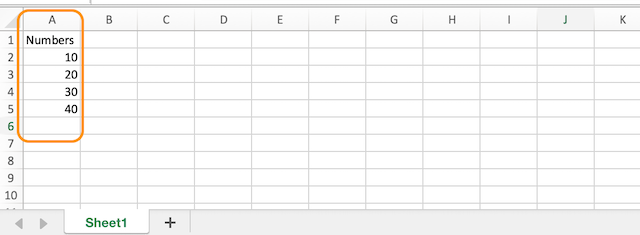

## Adding data to an existing workbook

In this example we want to add a column to our Excel file in which we will write the result of the condition below:

>If age is below 30 then "Youth rate" otherwise "Full rate"







In [ ]:
from google.colab import files

sheet_name = 'Sheet1'
column_name = 'Age'
value_target = 30
address = ''

if len(db.ws(ws=sheet_name).row(row=1)) != len(set(db.ws(ws=sheet_name).row(row=1))):
    print('There are several columns with similar headings. Please rename or delete them.')
else:
    for column_id, item in enumerate(db.ws(ws=sheet_name).row(row=1), start=1):
      if column_name == db.ws(sheet_name).index(row=1,col=column_id):
        address = column_id
        break

    if address == '':
        print('Column ' + str(column_name) + ' doesnt exist')
    else:
    
        list = db.ws(ws=sheet_name).col(col=address)
        list.pop(0)

        first_col_empty = len(db.ws(ws=sheet_name).row(row=1)) + 1
        db.ws(ws=sheet_name).update_index(row=1, col=first_col_empty, val='Tariffs')

        for row_id, item in enumerate(list, start=2):
          if item == '':
            continue
          elif int(item) < int(value_target):
            db.ws(ws=sheet_name).update_index(row=row_id, col=first_col_empty, val="Youth rate")
          else:
            db.ws(ws=sheet_name).update_index(row=row_id, col=first_col_empty, val="Full rate")

xl.writexl(db=db, fn="update_" + fn)
files.download("update_" + fn)

Result of "update_file_example_XLSX_100.xlsx" file:

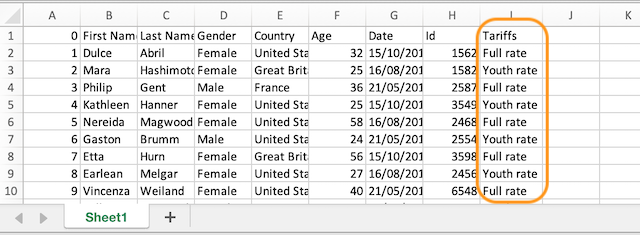